# Preparação dos dados


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from prophet import Prophet
import numpy as np
from sklearn.metrics import mean_squared_error
from prophet.plot import plot_plotly

In [ ]:
df = pd.read_csv("https://.githubrawusercontent.com/alura-cursos/data_science_projeto/refs/heads/main/Dados/bicicletas.csv")

In [ ]:
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [ ]:
df.shape

(17429, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17429 entries, 0 to 17428
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17429 non-null  object 
 1   contagem          17429 non-null  int64  
 2   temperatura       17406 non-null  float64
 3   sensacao_termica  17406 non-null  float64
 4   umidade           17429 non-null  float64
 5   velocidade_vento  17429 non-null  float64
 6   clima             17429 non-null  object 
 7   feriado           17429 non-null  object 
 8   fim_de_semana     17429 non-null  object 
 9   estacao           17429 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [ ]:
df.isnull().sum()#Vericando quantos são nulls

,0
data_hora,0
contagem,0
temperatura,23
sensacao_termica,23
umidade,0
velocidade_vento,0
clima,0
feriado,0
fim_de_semana,0
estacao,0


In [ ]:
df["temperatura"] = df['temperatura'].interpolate(method='linear')
df['sensacao_termica']= df['sensacao_termica'].interpolate(method='linear')

In [ ]:
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [ ]:
 df.duplicated().sum()#verificando quantos dados estão replicados

15

In [ ]:
duplicatas = df.duplicated(keep=False)
linhas_duplicadas = df[duplicatas]
linhas_duplicadas.sort_values(by="data_hora")

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
519,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
17422,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
869,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
17417,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
3655,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
17425,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
4167,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
17421,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
4658,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão
17418,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão


In [ ]:
df_limpo = df.drop_duplicates()

In [ ]:
df_limpo.shape

(17414, 10)

# Explorando os dados numéricos


In [ ]:
df_limpo.describe()

,contagem,temperatura,sensacao_termica,umidade,velocidade_vento
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468206,11.521080,72.324954,15.913063
std,1085.108068,5.571670,6.614799,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


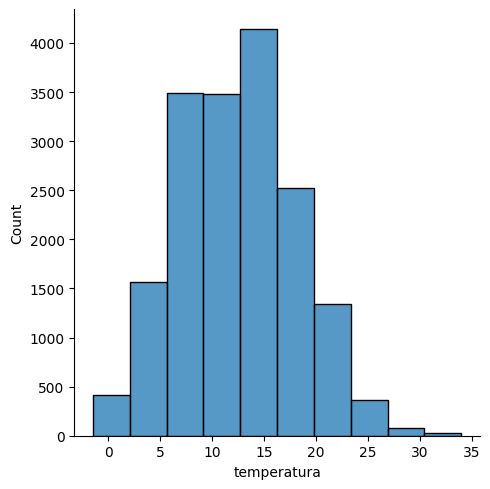

In [ ]:
#Gráfico temperatura
sns.displot(df_limpo,x="temperatura",bins=10)
plt.show()

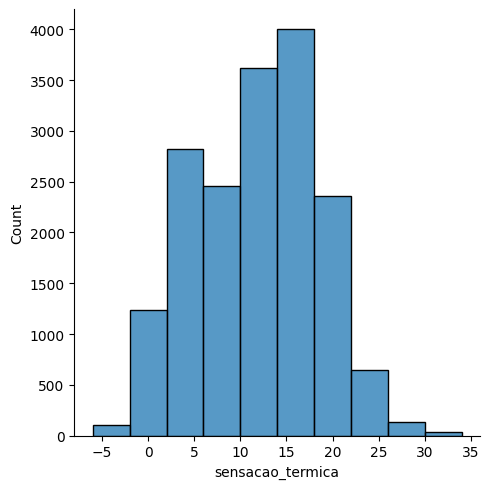

In [ ]:
#Gráfico Sensação térmica
sns.displot(df_limpo,x="sensacao_termica",bins=10)
plt.show()

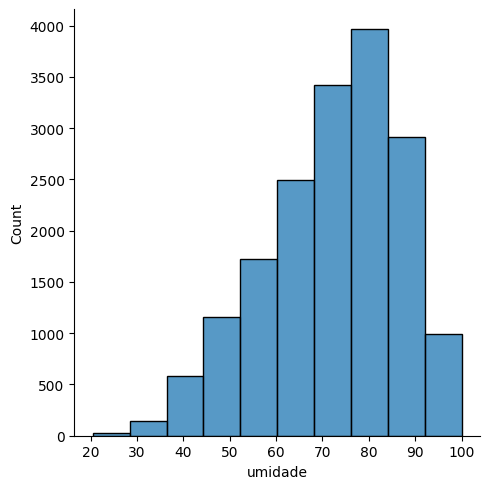

In [ ]:
#Gráfico Umidade
sns.displot(df_limpo,x="umidade",bins=10)
plt.show()

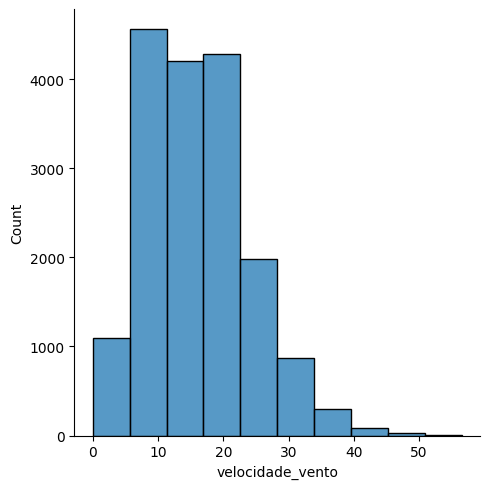

In [ ]:
#Gráfico velocidade do vento
sns.displot(df_limpo,x="velocidade_vento",bins=10)
plt.show()

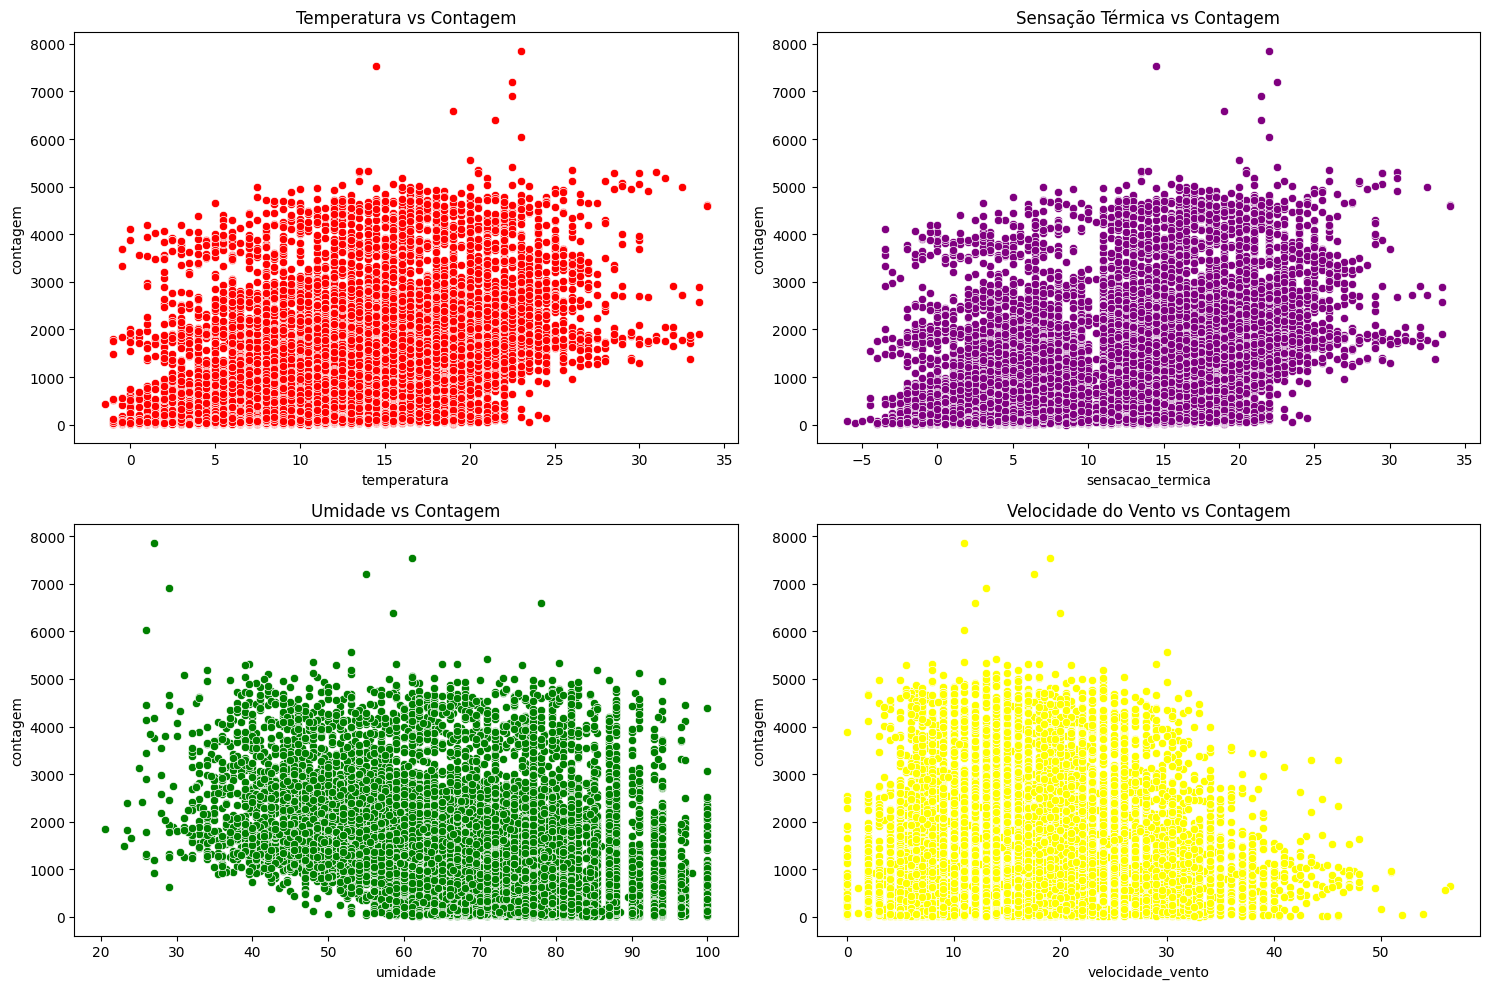

In [ ]:
#Gráfico de dispersão
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot the scatterplots
sns.scatterplot(ax=axes[0, 0], data=df_limpo, x='temperatura', y='contagem',color='red')
axes[0, 0].set_title('Temperatura vs Contagem')
sns.scatterplot(ax=axes[0, 1], data=df_limpo, x='sensacao_termica', y='contagem',color='purple')
axes[0, 1].set_title('Sensação Térmica vs Contagem')
sns.scatterplot(ax=axes[1, 0], data=df_limpo, x='umidade', y='contagem',color='green')
axes[1, 0].set_title('Umidade vs Contagem')
sns.scatterplot(ax=axes[1, 1], data=df_limpo, x='velocidade_vento', y='contagem',color='yellow')
axes[1, 1].set_title('Velocidade do Vento vs Contagem')

# Ajustando layout
plt.tight_layout()
plt.show()

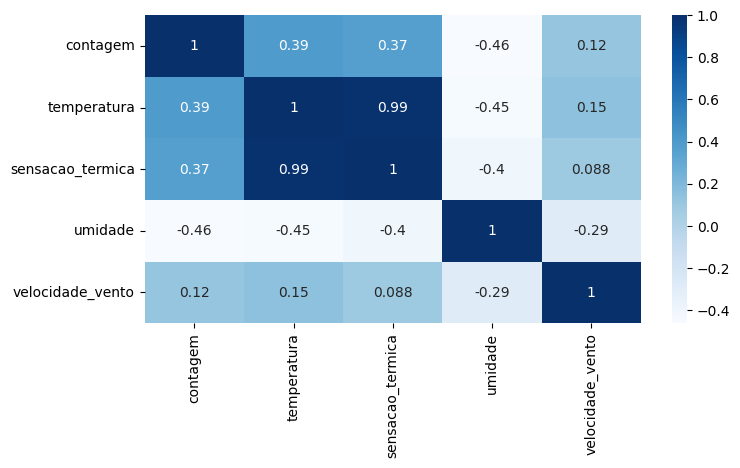

In [ ]:
#Gráfico correlção entre as variáveis
plt.figure(figsize=(8,4))

sns.heatmap(df_limpo.corr(numeric_only=True),annot=True,cmap='Blues')
plt.show()

#Explorando os dados categóricos


In [ ]:
#Descrição dos dados categóricos
df_limpo.describe(include=[object])

,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2015-01-04 00:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


In [ ]:
for col in ['clima','feriado','fim_de_semana','estacao']:
  print(f'Coluna: {col}')
  print(df_limpo[col].unique())
  print("="*25,'\n')

Coluna: clima
['Nublado' 'Céu limpo' 'Parcialmente nublado' 'Chuva leve' 'Neve'
 'Chuva com trovoadas']

Coluna: feriado
['Não' 'Sim']

Coluna: fim_de_semana
['Sim' 'Não']

Coluna: estacao
['Inverno' 'Primavera' 'Verão' 'Outono']



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


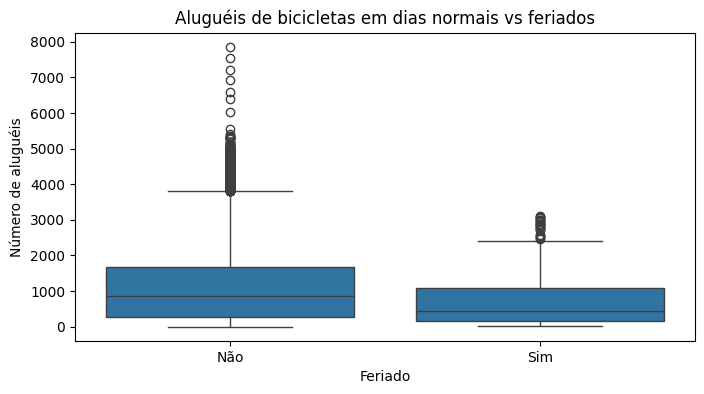

In [ ]:
#Gráfico box plot frequência da contratação das bicicletas nos dias normais e feriasdos
plt.figure(figsize=(8,4))
sns.boxplot(x='feriado',y='contagem',data=df_limpo,)
plt.title("Aluguéis de bicicletas em dias normais vs feriados")
plt.xlabel("Feriado")
plt.ylabel("Número de aluguéis")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


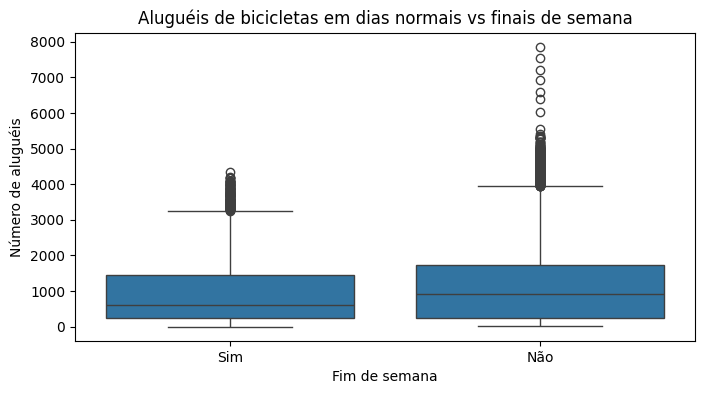

In [ ]:
#Gráfico box plot frequência da contratação das bicicletas nos dias de semana e fim de semana
plt.figure(figsize=(8,4))
sns.boxplot(x='fim_de_semana',y='contagem',data=df_limpo,)
plt.title("Aluguéis de bicicletas em dias normais vs finais de semana")
plt.xlabel("Fim de semana")
plt.ylabel("Número de aluguéis")
plt.show()

In [ ]:
mediana_feriado=df_limpo.groupby("feriado")['contagem'].median()
mediana_fim_de_semana=df_limpo.groupby("fim_de_semana")['contagem'].median()

In [ ]:
mediana_feriado

,contagem
feriado,
Não,855.0
Sim,439.5


In [ ]:
mediana_fim_de_semana

,contagem
fim_de_semana,
Não,927.0
Sim,619.0


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

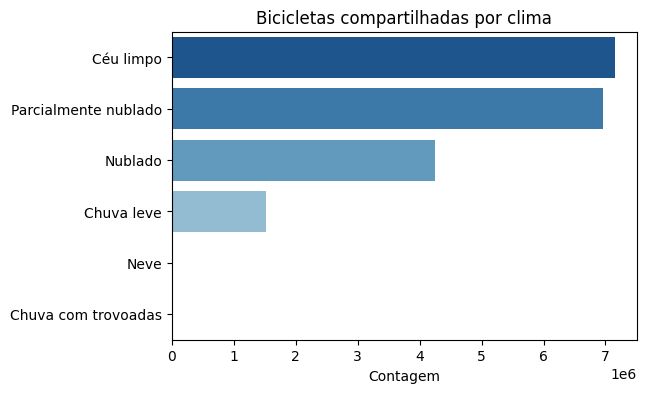

In [ ]:
#Visualisando como o clima impacta no aluguel das bicicletas
df_clima = df_limpo.groupby('clima')['contagem'].sum().reset_index().sort_values(by='contagem', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(data=df_clima, y='clima', x='contagem', hue='clima', palette='Blues_r', orient='h')
plt.title('Bicicletas compartilhadas por clima')
plt.xlabel('Contagem')
plt.ylabel('')
plt.show()

In [ ]:
df_clima

,clima,contagem
2,Céu limpo,7146847
5,Parcialmente nublado,6965558
4,Nublado,4243887
1,Chuva leve,1526461
3,Neve,15051
0,Chuva com trovoadas,8168


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

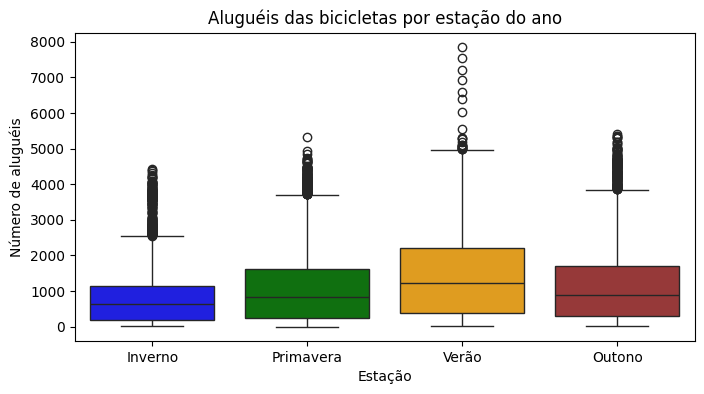

In [ ]:
plt.figure(figsize=(8,4))

paleta_cores = {"Primavera":'green','Verão':'orange','Outono':'brown','Inverno':"blue"}
sns.boxplot(x='estacao',y='contagem',data=df_limpo,hue='estacao',palette=paleta_cores)
plt.title("Aluguéis das bicicletas por estação do ano")
plt.xlabel("Estação")
plt.ylabel("Número de aluguéis")
plt.show()

In [ ]:
mediana_estacao = df_limpo.groupby("estacao")['contagem'].median()

In [ ]:
mediana_estacao

,contagem
estacao,
Inverno,632.0
Outono,898.0
Primavera,823.0
Verão,1214.0


In [ ]:
#Hipótese nula: as distribuições do outono e primavera são iguais
primavera = df_limpo[df_limpo["estacao"]=='Primavera']['contagem']
outono = df_limpo[df_limpo["estacao"]=='Outono']['contagem']

u_statistic,p_value = mannwhitneyu(primavera,outono,alternative='two-sided')
u_statistic,p_value
#Como p_value<0.05 então a hipótese nula é descartada

(9044682.5, 0.0004762100221646296)

#Analisando o comportamento dos dados ao longo do tempo

In [ ]:
df_data = df_limpo.copy()

In [ ]:
df_data['data_hora'] = pd.to_datetime(df_data['data_hora'])
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_hora         17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
df_data['mes']=df_data['data_hora'].dt.month
df_data['horario']=df_data['data_hora'].dt.hour

In [ ]:
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [ ]:
# Retirando o horário da coluna data_hora

df_data['data_hora'] = df_data['data_hora'].dt.date

df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [ ]:
df_data = df_data.rename(columns={'data_hora':'data'})

df_data.head()

,data,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [ ]:
#Data voltou a ser objeto
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data              17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
 10  mes               17414 non-null  int32  
 11  horario           17414 non-null  int32  
dtypes: float64(4), int32(2), int64(1), object(5)
memory usage: 2.1+ MB


In [ ]:
df_data['data']=pd.to_datetime(df_data['data'])

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
 10  mes               17414 non-null  int32         
 11  horario           17414 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(4)
memory usage: 2.1+ MB


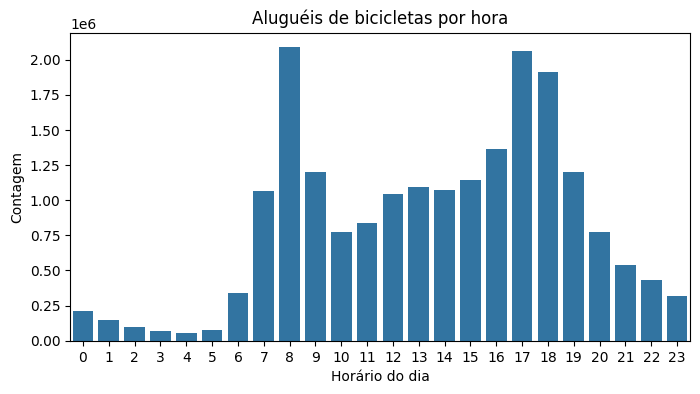

In [ ]:
#Analisando a quantidade de aluguéis relacionando com as horas do dia
df_por_hora = df_data.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=df_por_hora,x='horario',y='contagem')
plt.title("Aluguéis de bicicletas por hora")
plt.xlabel("Horário do dia")
plt.ylabel('Contagem')

plt.show()

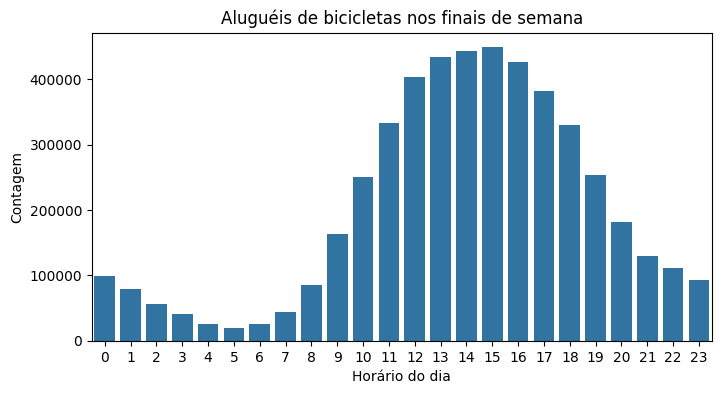

In [ ]:
#Analisando a quantidade de aluguéis nos finais de semana relacionando com as horas do dia
df_fim_de_semana = df_data[df_data['fim_de_semana']=='Sim']

alugueis_fim_de_semana = df_fim_de_semana.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=alugueis_fim_de_semana,x='horario',y='contagem')
plt.title("Aluguéis de bicicletas nos finais de semana")
plt.xlabel("Horário do dia")
plt.ylabel('Contagem')

plt.show()

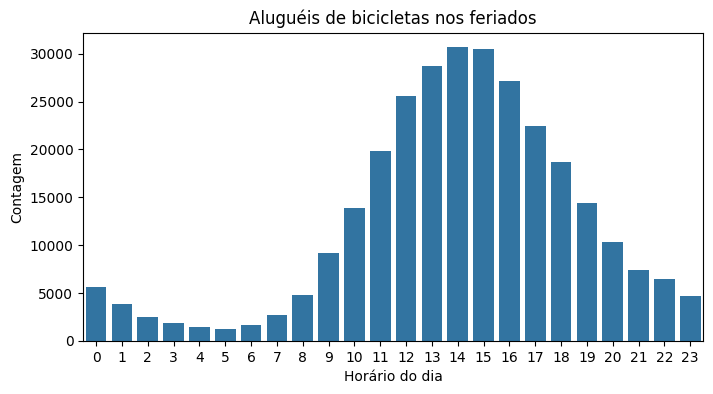

In [ ]:
#Analisando a quantidade de aluguéis nos feriados relacionando com as horas do dia
df_feriados=df_data[df_data['feriado']=='Sim']

alugueis_feriados=df_feriados.groupby('horario')['contagem'].sum().reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data=alugueis_feriados,x='horario',y='contagem')
plt.title('Aluguéis de bicicletas nos feriados')
plt.xlabel('Horário do dia')
plt.ylabel('Contagem')
plt.show()

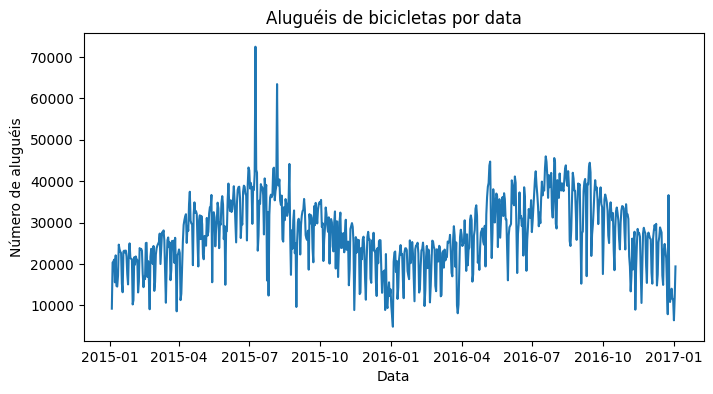

In [ ]:
#Séries temporais
df_tempo = df_data.groupby('data')['contagem'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data=df_tempo,x='data',y='contagem')
plt.title('Aluguéis de bicicletas por data')
plt.xlabel('Data')
plt.ylabel('Número de aluguéis')

plt.show()

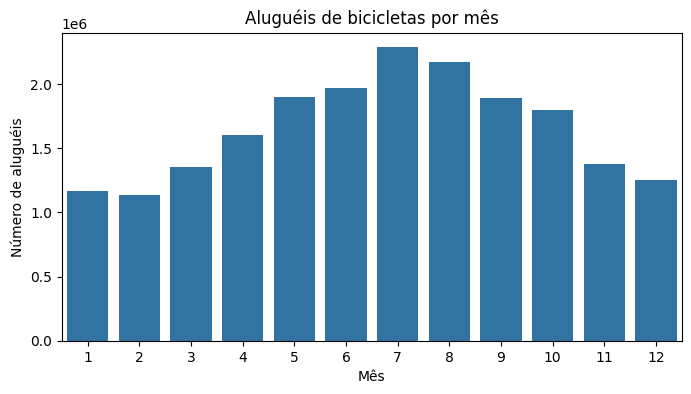

In [ ]:
#Alugueis distribuidos ao longo dos meses
alugueis_mensais = df_data.groupby('mes')['contagem'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=alugueis_mensais,x='mes',y='contagem')
plt.title('Aluguéis de bicicletas por mês')
plt.xlabel('Mês')
plt.ylabel('Número de aluguéis')

plt.show()

#Construção de modelo preditivo



In [ ]:
df_prophet = df_data[['data','contagem']].rename(columns={'data':'ds','contagem':'y'})
df_prophet.head(5)

,ds,y
0,2015-01-04,182
1,2015-01-04,138
2,2015-01-04,134
3,2015-01-04,72
4,2015-01-04,47


In [ ]:
#Agrupando os dias
df_prophet = df_prophet.groupby('ds')['y'].sum().reset_index()
df_prophet.head(5)

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601


In [ ]:
#escolhendo a seed e criando modelo
np.random.seed(4587)

modelo = Prophet()
modelo.fit(df_prophet)

futuro = modelo.make_future_dataframe(periods=90,freq='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxu43ltu0/qqi4iuap.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxu43ltu0/ycmew8w5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1201', 'data', 'file=/tmp/tmpxu43ltu0/qqi4iuap.json', 'init=/tmp/tmpxu43ltu0/ycmew8w5.json', 'output', 'file=/tmp/tmpxu43ltu0/prophet_modelxfdi3i4f/prophet_model-20241003192530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:25:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:25:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


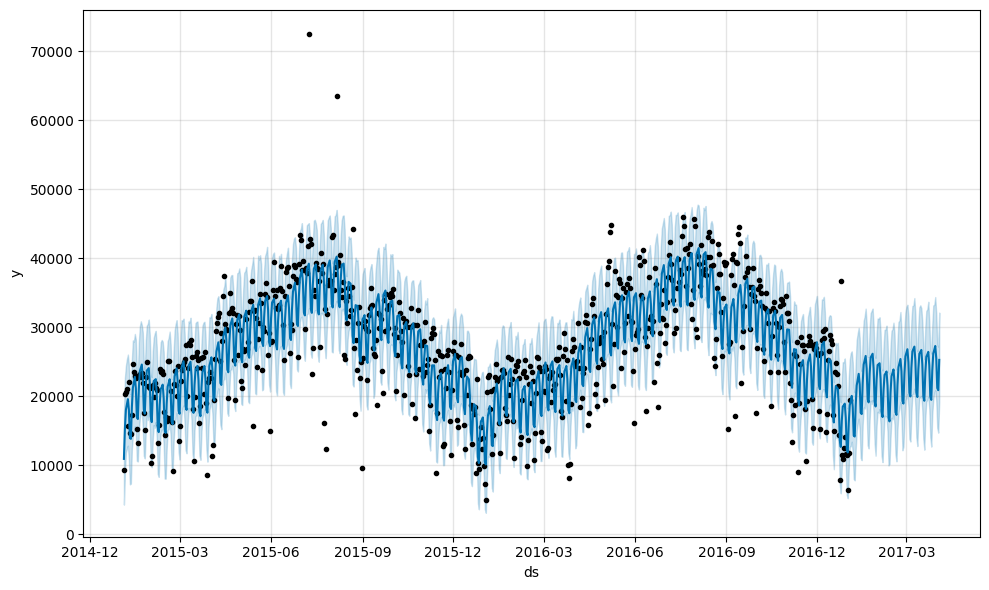

In [ ]:
#Previsão dos próximos 3 meses a partir de janeiro de 2017
fig1 = modelo.plot(previsao)

In [ ]:
previsao[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,10901.148240,4272.992256,17164.501687
1,2015-01-05,15311.232708,8913.287413,22636.582586
2,2015-01-06,18014.350866,11829.942639,24414.201504
3,2015-01-07,18744.719144,12344.154062,25364.884607
4,2015-01-08,19556.191727,12809.812197,26023.639264
...,...,...,...,...
815,2017-03-30,27262.740955,20840.917738,34360.842038
816,2017-03-31,25490.750990,19305.507172,31997.954460
817,2017-04-01,21173.750109,15400.577315,27665.232260
818,2017-04-02,20856.740496,14700.917577,27176.730648


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

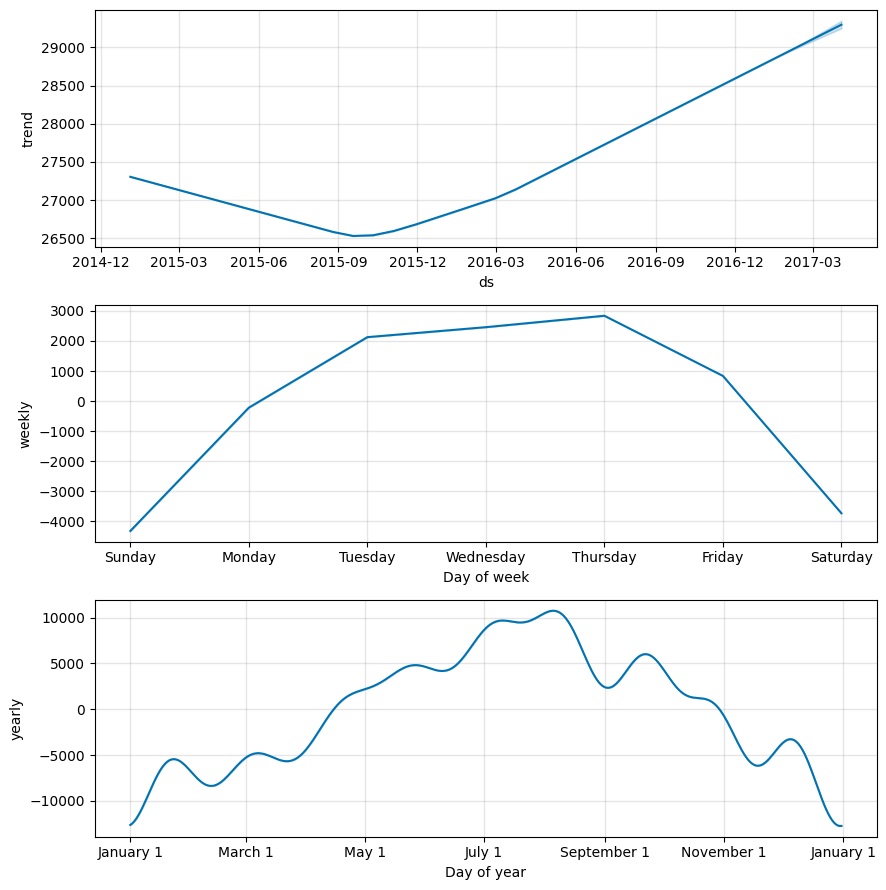

In [ ]:
#Visualisando quais componentes o modelo utilizou para a previsão
fig2=modelo.plot_components(previsao)

In [ ]:
df_prophet.shape

(730, 2)

In [ ]:
#Criando DataFrame de treino
df_treino = pd.DataFrame()

# Separando 80% dos dados para treino
df_treino['ds'] = df_prophet['ds'][:584] #
df_treino['y'] = df_prophet['y'][:584]

In [ ]:
#Criando DataFrame de teste
df_teste = pd.DataFrame()

# Separando 20% dos dados para teste
df_teste['ds'] = df_prophet['ds'][584:]
df_teste['y'] = df_prophet['y'][584:]

In [ ]:
np.random.seed(4587)

modelo = Prophet()
modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods=150, freq='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxu43ltu0/j__p1f4a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxu43ltu0/sa7demca.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30123', 'data', 'file=/tmp/tmpxu43ltu0/j__p1f4a.json', 'init=/tmp/tmpxu43ltu0/sa7demca.json', 'output', 'file=/tmp/tmpxu43ltu0/prophet_model1rm12zr8/prophet_model-20241003192536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:25:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:25:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


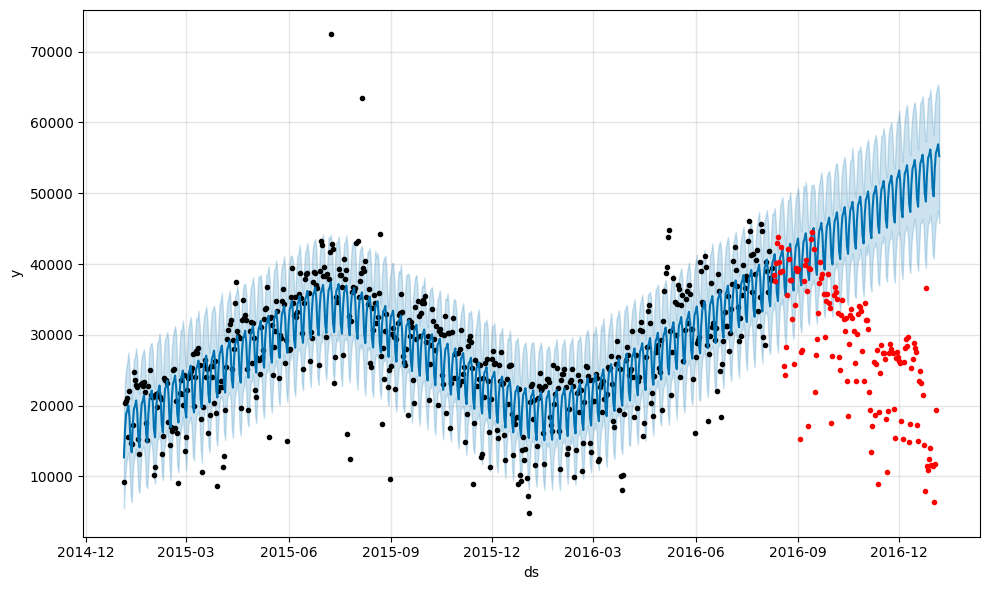

In [ ]:
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


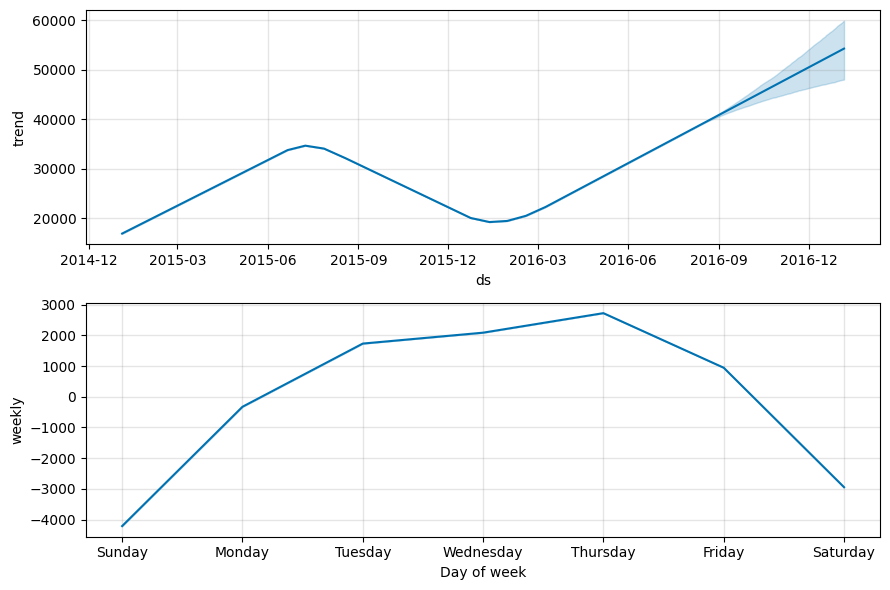

In [ ]:
fig2 = modelo.plot_components(previsao)
#Percebe-se que o modelo não está analisando o ano como um todo, por isso a previsão não esta batendo com o teste

In [ ]:
df_previsao = previsao[['ds','yhat']]
df_comparacao = pd.merge(df_previsao,df_teste,on='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,40646.666399,38430
1,2016-08-11,41387.553580,37626
2,2016-08-12,39717.735888,40159
3,2016-08-13,35936.820545,43041
4,2016-08-14,34777.785741,43848
...,...,...,...
141,2016-12-30,54505.511686,11566
142,2016-12-31,50724.596343,11424
143,2017-01-01,49565.561539,6421
144,2017-01-02,53551.536790,11823


Fórmula do Erro Quadrático Médio:

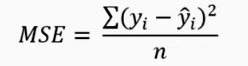

In [ ]:
mse=mean_squared_error(df_comparacao['y'],df_comparacao['yhat'])
rmse = np.sqrt(mse)
print(f'O MSE é: {mse}')
print(f'O RMSE é: {rmse}')
#Ou seja o modelo esta tendo um erro de mais ou menos 20 mil bicicletas
#Como é um erro muito alto é necessário revisar o modelo

O MSE é: 466132050.6184666
O RMSE é: 21590.09149166503


#Melhorando as previsões

In [ ]:
np.random.seed(4587)
#Adicionando a sazonalidade anual
modelo = Prophet(yearly_seasonality=True)
modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods=150, freq='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxu43ltu0/_mm30y9y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxu43ltu0/aup942_f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88790', 'data', 'file=/tmp/tmpxu43ltu0/_mm30y9y.json', 'init=/tmp/tmpxu43ltu0/aup942_f.json', 'output', 'file=/tmp/tmpxu43ltu0/prophet_modelyi5zyevf/prophet_model-20241003192705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:27:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:27:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


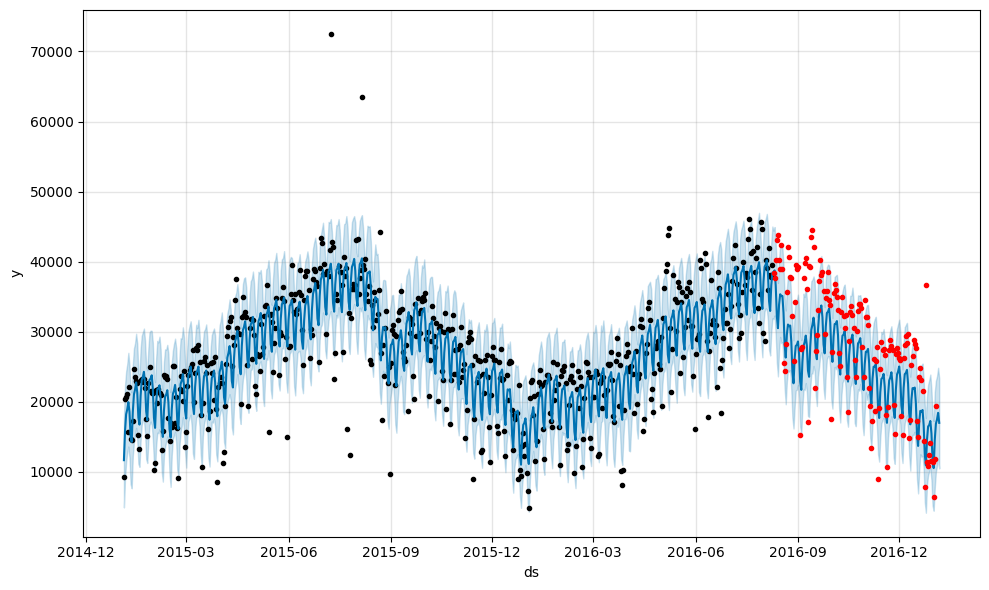

In [ ]:
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

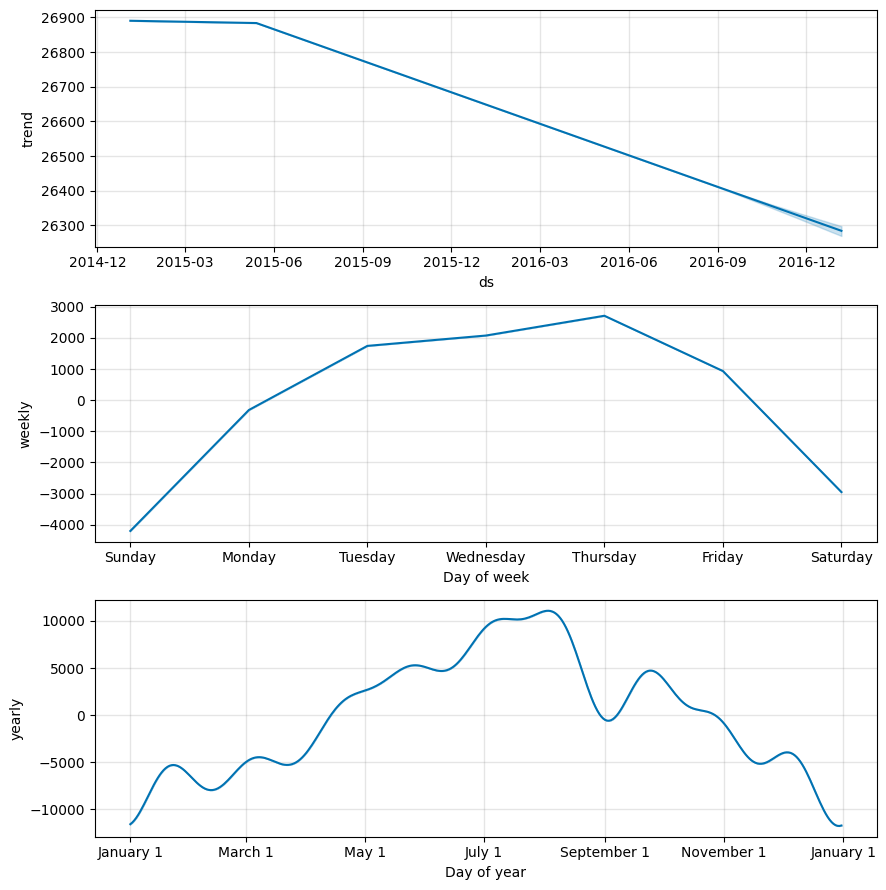

In [ ]:
fig2 = modelo.plot_components(previsao)

In [ ]:
#Verificando RSME
df_previsao = previsao[['ds','yhat']]
df_comparacao = pd.merge(df_previsao,df_teste,on='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,38465.369605,38430
1,2016-08-11,38747.157010,37626
2,2016-08-12,36570.384861,40159
3,2016-08-13,32236.934232,43041
4,2016-08-14,30495.324496,43848
...,...,...,...
141,2016-12-30,15472.686807,11566
142,2016-12-31,11648.789994,11424
143,2017-01-01,10517.646095,6421
144,2017-01-02,14573.011741,11823


In [ ]:
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)
#O RSME diminuiu de uma margem de erro de 20 mil bikes para 6 mil
print(f'MSE:{mse}, RMSE:{rmse}')

MSE:38623883.499975376, RMSE:6214.8116222437


In [ ]:
df_prophet

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [ ]:
np.random.seed(4587)

modelo = Prophet()
modelo.fit(df_prophet)
futuro = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxu43ltu0/jm8gq1k3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxu43ltu0/igzjp4w8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44491', 'data', 'file=/tmp/tmpxu43ltu0/jm8gq1k3.json', 'init=/tmp/tmpxu43ltu0/igzjp4w8.json', 'output', 'file=/tmp/tmpxu43ltu0/prophet_modelmblv0vx1/prophet_model-20241003193235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:32:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:32:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
sem_outliers = df_prophet[(df_prophet['y']>previsao['yhat_lower'])&(df_prophet['y']<previsao['yhat_upper'])]


In [ ]:
sem_outliers

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [ ]:
df_treino = pd.DataFrame()

df_treino['ds']=sem_outliers['ds'][:505]
df_treino['y'] = sem_outliers['y'][:505]

In [ ]:
df_treino = pd.DataFrame()

df_teste['ds']=sem_outliers['ds'][505:]
df_teste['y'] = sem_outliers['y'][505:]

In [ ]:
#Criando o modelo sem os outliers
np.random.seed(4587)

modelo_sem_outliers = Prophet(yearly_seasonality=True)
modelo_sem_outliers.fit(df_treino)
futuro = modelo_sem_outliers.make_future_dataframe(periods=150, freq='D')
previsao = modelo_sem_outliers.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxu43ltu0/ntgbm8v2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxu43ltu0/zu8cr3zl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91524', 'data', 'file=/tmp/tmpxu43ltu0/ntgbm8v2.json', 'init=/tmp/tmpxu43ltu0/zu8cr3zl.json', 'output', 'file=/tmp/tmpxu43ltu0/prophet_model1i9fphl5/prophet_model-20241003194125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:41:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:41:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


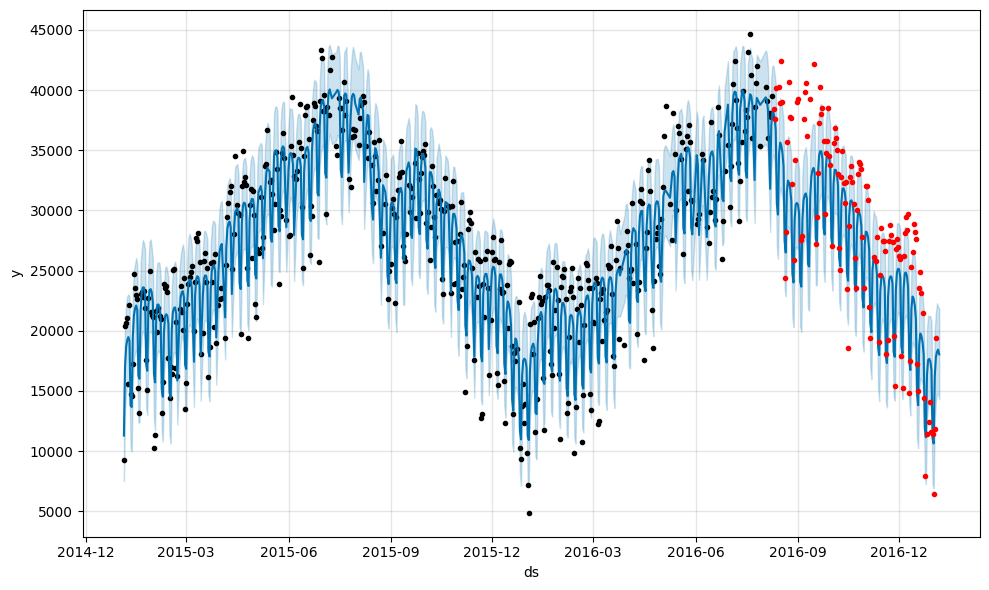

In [ ]:
fig1 = modelo_sem_outliers.plot(previsao)
plt.plot(df_teste['ds'],df_teste['y'],'.r')

In [ ]:
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,38124.205916,38430.0
1,2016-08-11,37708.703632,37626.0
2,2016-08-12,36664.046726,40159.0
3,2016-08-15,34692.056037,40236.0
4,2016-08-16,35633.113613,38911.0
...,...,...,...
121,2016-12-30,16752.064183,11566.0
122,2016-12-31,11045.380016,11424.0
123,2017-01-01,10626.497538,6421.0
124,2017-01-02,16230.512446,11823.0


In [ ]:
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 15672925.764235971, RMSE: 3958.904616713564


In [ ]:
#Criando o modelo sem os outliers aumentando o período
np.random.seed(4587)

modelo_sem_outliers = Prophet(yearly_seasonality=True)
modelo_sem_outliers.fit(df_treino)
futuro = modelo_sem_outliers.make_future_dataframe(periods=365, freq='D')
previsao = modelo_sem_outliers.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxu43ltu0/dh9e3mq1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxu43ltu0/fu7lfnxo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58413', 'data', 'file=/tmp/tmpxu43ltu0/dh9e3mq1.json', 'init=/tmp/tmpxu43ltu0/fu7lfnxo.json', 'output', 'file=/tmp/tmpxu43ltu0/prophet_modelv_0epk_o/prophet_model-20241003194604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:46:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:46:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Gráfico interativo
fig = plot_plotly(modelo_sem_outliers, previsao)
fig.show()